# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [272]:
# Carregando o  DataFrame
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [235]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [236]:
sinasc_raw['IDADEPAI'].fillna(sinasc_raw['IDADEPAI'].mean(), inplace=True)

In [237]:
sinasc_raw['IDADEPAI'].isna().sum()

0

In [238]:
# Calculando a média
sinasc_raw.groupby('munResNome')[['IDADEPAI', 'IDADEMAE']].mean()

,IDADEPAI,IDADEMAE
munResNome,,
Alta Floresta D'Oeste,29.796873,25.991826
Alto Alegre dos Parecis,29.427586,24.844156
Alto Paraíso,31.032439,24.960177
Alvorada D'Oeste,30.924031,25.770732
Ariquemes,31.104337,25.607866
Buritis,31.061687,25.559177
Cabixi,31.335484,26.037500
Cacaulândia,31.511688,25.546667
Cacoal,30.944942,26.890102


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [239]:
# Convertendo o tipo da coluna para um objeto datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [240]:
# Filtrando a base de dados para os bebês nascidos no dia 06/05
filter = sinasc_raw[(sinasc_raw['DTNASC'].dt.month == 5) & (sinasc_raw['DTNASC'].dt.day == 6)]

In [241]:
# Calculando a média de peso
filter.groupby('ESCMAE')[['PESO']].mean()

,PESO
ESCMAE,
12 anos ou mais,3381.450000
4 a 7 anos,2926.238095
8 a 11 anos,3100.478261


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [242]:
vc = sinasc_raw['munResNome'].value_counts()
vc
# O município que menos nasceu bebês em 2019 foi Castanheiras

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

In [243]:
# Calculando a idade mínima, média e máxima das mãe e dos pais de cada município
sinasc = sinasc_raw.groupby('munResNome').aggregate({'IDADEMAE': ['min', 'mean', 'max'], 'IDADEPAI': ['min', 'mean', 'max']})
sinasc['bebesNascidos'] =  vc[sinasc.index].values
sinasc

IDADEMAE                IDADEPAI             \
                               min       mean max      min       mean   
munResNome                                                              
Alta Floresta D'Oeste           14  25.991826  53     17.0  29.796873   
Alto Alegre dos Parecis         14  24.844156  41     16.0  29.427586   
Alto Paraíso                    11  24.960177  42     21.0  31.032439   
Alvorada D'Oeste                15  25.770732  44     17.0  30.924031   
Ariquemes                       13  25.607866  44     20.0  31.104337   
Buritis                         14  25.559177  44     18.0  31.061687   
Cabixi                          13  26.037500  39     19.0  31.335484   
Cacaulândia                     16  25.546667  42     28.0  31.511688   
Cacoal                          14  26.890102  47     17.0  30.944942   
Campo Novo de Rondônia          13  24.825301  40     21.0  30.985352   
Candeias do Jamari              14  25.243323  45     21.0  31.024890   
Castanheiras                    17  27.281250  39     17.0  30.480302   
Cerejeiras                      15  27.240506  53     19.0  31.262652   
Chupinguaia                     13  25.333333  42     20.0  30.848617   
Colorado do Oeste               15  27.602804  47     23.0  31.565009   
Corumbiara                      15  24.716535  43     21.0  31.276895   
Costa Marques                   12  24.412017  41     17.0  31.002002   
Cujubim                         14  24.482927  42     19.0  31.107419   
Espigão D'Oeste                 14  26.093333  44     16.0  31.167108   
Governador Jorge Teixeira       13  24.401786  41     22.0  30.942132   
Guajará-Mirim                   13  25.462228  43     19.0  31.078880   
Itapuã do Oeste                 15  26.064220  46     25.0  31.929669   
Jaru                            12  25.982974  45     19.0  31.270482   
Ji-Paraná                       12  26.361137  44     15.0  31.111323   
Machadinho D'Oeste              13  25.480000  44     17.0  31.141193   
Ministro Andreazza              17  27.904762  44     21.0  33.488292   
Mirante da Serra                14  26.304878  46     20.0  31.636544   
Monte Negro                     14  25.648241  40     20.0  31.597000   
Município ignorado - RO         24  24.000000  24     22.0  22.000000   
Nova Brasilândia D'Oeste        15  26.222222  51     20.0  30.987296   
Nova Mamoré                     14  25.326389  46     19.0  31.146572   
Nova União                      16  26.894231  39     18.0  31.280213   
Novo Horizonte do Oeste         15  26.938776  41     20.0  31.522463   
Ouro Preto do Oeste             14  26.375594  44     17.0  31.175663   
Parecis                         16  26.454545  41     18.0  32.285329   
Pimenta Bueno                   13  25.199675  47     16.0  29.959508   
Pimenteiras do Oeste            14  25.075000  40     25.0  31.655863   
Porto Velho                     12  26.312670  47     16.0  31.192794   
Presidente Médici               14  25.796053  44     16.0  30.475999   
Primavera de Rondônia           16  27.023256  39     21.0  31.759230   
Rio Crespo                      16  26.660000  39     28.0  31.030567   
Rolim de Moura                  14  26.600863  44     16.0  30.433120   
Santa Luzia D'Oeste             15  26.121212  41     18.0  30.734741   
Seringueiras                    14  24.910714  42     20.0  30.972521   
São Felipe D'Oeste              17  26.481481  41     18.0  31.362120   
São Francisco do Guaporé        14  25.660066  41     19.0  31.157342   
São Miguel do Guaporé           14  25.926346  42     19.0  31.453645   
Teixeirópolis                   16  26.031250  39     20.0  31.372630   
Theobroma                       15  25.536082  42     23.0  30.967580   
Urupá                           15  26.688235  43     17.0  31.037412   
Vale do Anari                   14  26.096774  44     23.0  31.561380   
Vale do Paraíso                 14  25.679012  52     18.0  30.500145   
Vilhena    

In [244]:
# Município de Castanheiras
sinasc[sinasc.index == 'Castanheiras']

IDADEMAE               IDADEPAI                  bebesNascidos
                  min      mean max      min       mean   max              
munResNome                                                                 
Castanheiras       17  27.28125  39     17.0  30.480302  43.0            32

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [245]:
# Filtrando a base para os bebês nascidos em março
filter = sinasc_raw[(sinasc_raw['DTNASC'].dt.month == 3)]

In [246]:
vc = filter['munResNome'].value_counts()
vc
# O município com mais bebês nascidos em março foi Porto Velho

Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Machadinho D'Oeste            44
Espigão D'Oeste               44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alto Paraíso                  22
Alvorada D'Oeste              22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14
Vale do Pa

In [247]:
# Calculando a mínima, média e máxima de bebês nascidos vivos por município
sinasc = filter.groupby('munResNome').aggregate({'QTDFILVIVO': ['min', 'mean', 'max']})
sinasc

QTDFILVIVO               
                                 min      mean  max
munResNome                                         
Alta Floresta D'Oeste            0.0  0.903226  4.0
Alto Alegre dos Parecis          0.0  0.888889  2.0
Alto Paraíso                     0.0  1.285714  3.0
Alvorada D'Oeste                 0.0  1.000000  3.0
Ariquemes                        0.0  1.064748  4.0
Buritis                          0.0  1.421053  4.0
Cabixi                           0.0  0.833333  3.0
Cacaulândia                      0.0  1.200000  4.0
Cacoal                           0.0  0.969697  7.0
Campo Novo de Rondônia           0.0  1.285714  2.0
Candeias do Jamari               0.0  1.250000  4.0
Castanheiras                     1.0  1.750000  3.0
Cerejeiras                       0.0  0.875000  2.0
Chupinguaia                      0.0  1.055556  4.0
Colorado do Oeste                0.0  1.000000  4.0
Corumbiara                       0.0  0.909091  3.0
Costa Marques                    0.0  1.208333  4.0
Cujubim                          0.0  1.294118  5.0
Espigão D'Oeste                  0.0  1.386364  6.0
Governador Jorge Teixeira        0.0  0.555556  2.0
Guajará-Mirim                    0.0  1.534247  8.0
Itapuã do Oeste                  0.0  1.285714  3.0
Jaru                             0.0  1.025641  5.0
Ji-Paraná                        0.0  0.828877  4.0
Machadinho D'Oeste               0.0  1.000000  6.0
Ministro Andreazza               0.0  1.166667  3.0
Mirante da Serra                 0.0  1.000000  2.0
Monte Negro                      0.0  0.700000  3.0
Nova Brasilândia D'Oeste         0.0  0.947368  3.0
Nova Mamoré                      0.0  1.360000  6.0
Nova União                       0.0  0.571429  1.0
Novo Horizonte do Oeste          1.0  1.200000  2.0
Ouro Preto do Oeste              0.0  1.014925  5.0
Parecis                          1.0  1.833333  5.0
Pimenta Bueno                    0.0  0.836066  4.0
Pimenteiras do Oeste             0.0  1.000000  2.0
Porto Velho                      0.0  1.295056  9.0
Presidente Médici                0.0  0.724138  3.0
Primavera de Rondônia            0.0  1.200000  2.0
Rio Crespo                       0.0  1.000000  3.0
Rolim de Moura                   0.0  0.724638  5.0
Santa Luzia D'Oeste              0.0  0.428571  2.0
Seringueiras                     0.0  1.000000  2.0
São Felipe D'Oeste               0.0  0.000000  0.0
São Francisco do Guaporé         0.0  1.161290  6.0
São Miguel do Guaporé            0.0  1.000000  4.0
Teixeirópolis                    0.0  0.333333  1.0
Theobroma                        0.0  1.125000  2.0
Urupá                            0.0  0.928571  2.0
Vale do Anari                    0.0  0.818182  2.0
Vale do Paraíso                  0.0  0.583333  2.0
Vilhena                          0.0  0.979592  5.0

In [248]:
# Calculando a mínima, média e máxima de bebês nascidos vivos no município de Porto Velho
sinasc[sinasc.index == 'Porto Velho']

QTDFILVIVO               
                   min      mean  max
munResNome                           
Porto Velho        0.0  1.295056  9.0

In [249]:
# Calculando a idade mínima, média e máxima das mãe e dos pais de cada município
sinasc = filter.groupby('munResNome').aggregate({'IDADEMAE': ['min', 'mean', 'max'], 'IDADEPAI': ['min', 'mean', 'max']})
sinasc['bebesNascidos'] =  vc[sinasc.index].values
sinasc

IDADEMAE                  IDADEPAI             \
                               min       mean max        min       mean   
munResNome                                                                
Alta Floresta D'Oeste           18  26.193548  35  20.000000  30.343449   
Alto Alegre dos Parecis         17  25.100000  36  21.000000  29.409241   
Alto Paraíso                    11  24.818182  41  23.000000  30.629468   
Alvorada D'Oeste                15  25.772727  36  26.000000  32.141317   
Ariquemes                       14  25.304965  42  28.000000  31.040803   
Buritis                         15  25.406780  42  18.000000  31.543215   
Cabixi                          17  28.000000  36  31.092415  31.092415   
Cacaulândia                     18  26.200000  32  31.092415  31.092415   
Cacoal                          15  26.466165  40  17.000000  30.097869   
Campo Novo de Rondônia          17  22.153846  35  21.000000  30.035544   
Candeias do Jamari              17  24.363636  40  25.000000  30.907796   
Castanheiras                    27  30.500000  35  32.000000  36.000000   
Cerejeiras                      17  27.062500  33  26.000000  31.165432   
Chupinguaia                     13  26.277778  42  20.000000  30.511189   
Colorado do Oeste               17  27.736842  39  27.000000  32.704538   
Corumbiara                      18  24.083333  37  31.092415  31.584714   
Costa Marques                   15  25.666667  36  19.000000  30.584714   
Cujubim                         16  24.882353  40  31.092415  31.557567   
Espigão D'Oeste                 16  25.409091  43  19.000000  30.802132   
Governador Jorge Teixeira       16  24.500000  33  31.092415  31.092415   
Guajará-Mirim                   14  26.333333  43  26.000000  31.183284   
Itapuã do Oeste                 17  25.625000  39  31.092415  32.080863   
Jaru                            14  26.550000  40  21.000000  31.393363   
Ji-Paraná                       13  25.377660  44  16.000000  30.960609   
Machadinho D'Oeste              14  26.295455  43  23.000000  31.360565   
Ministro Andreazza              19  27.166667  35  27.000000  38.000000   
Mirante da Serra                16  24.888889  37  30.000000  31.071878   
Monte Negro                     15  25.650000  36  22.000000  32.264690   
Nova Brasilândia D'Oeste        20  26.650000  35  25.000000  30.878553   
Nova Mamoré                     15  24.207547  42  19.000000  31.129838   
Nova União                      16  23.428571  38  26.000000  29.481380   
Novo Horizonte do Oeste         19  29.000000  37  24.000000  30.400000   
Ouro Preto do Oeste             14  25.522388  44  19.000000  30.544705   
Parecis                         20  28.000000  37  24.000000  30.182069   
Pimenta Bueno                   14  25.177419  39  17.000000  29.802247   
Pimenteiras do Oeste            19  23.000000  29  31.092415  31.092415   
Porto Velho                     14  26.596774  44  19.000000  31.387133   
Presidente Médici               14  25.344828  38  24.000000  31.978835   
Primavera de Rondônia           22  26.800000  33  27.000000  32.418483   
Rio Crespo                      20  28.888889  37  31.092415  31.092415   
Rolim de Moura                  18  27.594203  41  19.000000  31.250395   
Santa Luzia D'Oeste             18  23.285714  27  19.000000  27.142857   
Seringueiras                    18  25.473684  39  26.000000  30.972560   
São Felipe D'Oeste              19  23.600000  31  27.000000  29.618483   
São Francisco do Guaporé        14  25.677419  35  19.000000  30.989678   
São Miguel do Guaporé           14  26.365854  42  30.000000  31.280775   
Teixeirópolis                   21  26.666667  32  22.000000  27.000000   
Theobroma                       20  26.875000  35  26.000000  30.444311   
Urupá                           18  26.357143  38  22.000000  30.292315   
Vale do Anari                   19  24.545455  34  30.000000  31.339938   
Vale do Paraíso                 16  23.615385  33  

In [250]:
# Município de Porto Velho
sinasc[sinasc.index == 'Porto Velho']

IDADEMAE                IDADEPAI                  bebesNascidos
                 min       mean max      min       mean   max              
munResNome                                                                 
Porto Velho       14  26.596774  44     19.0  31.387133  62.0           744

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

<Axes: xlabel='ESCMAE', ylabel='QTDFILVIVO'>

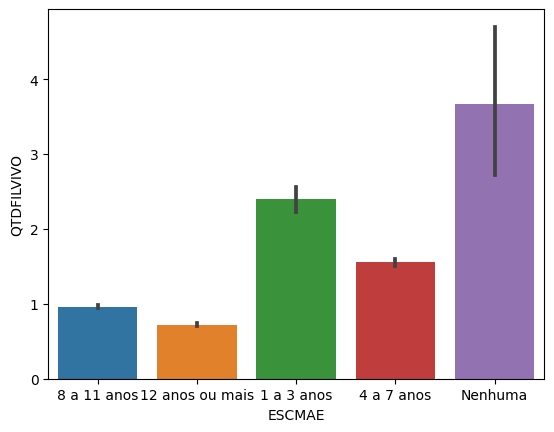

In [273]:
sns.barplot(x='ESCMAE', y='QTDFILVIVO', data=sinasc_raw)

### INSIGHT

- Mulheres com um baixo ou nenhum nível de escolaridade tendem a ter mais filhos, como mostra o gráfico acima
